<a href="https://colab.research.google.com/github/MayankMV2/weatherise-Mayank-verma/blob/main/starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing Required Packages

In [1]:
!pip install pyinputplus matplotlib requests


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyinputplus: filename=pyinputplus-0.2.12-py3-none-any.whl size=11348 sha256=57bd5f4eb297c66e2d3e00d96d305e74045f635e8f4b4c3cf5f76c4a58f3ee88
  Stored in directory: /root/.cache/pip/wheels/85/81/c1/325c8199c5c4de8a0b9af900ff9cd8bd69853e3d9419493512
  Created wheel for pysimplevalidate: filename=pysimplevalidate-0.2.12-py3-none-any.whl size=16225 sha256=5af8a74cf3aacb092312c0f097ca8dc3019a6e0dd446e60b0ba3f65ea1867849
  Stored in directory: /root/.cache/pip/wheels/09/de/18/4dd2be0dbdf31870c6f0abde43b0de197b1c095655ad7da5c2
  Created wheel for stdiomask: filename=stdiomask


Importing Required Modules

In [2]:
import os
import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip

Weather Data Function using wttr

In [3]:
def get_weather_data(city_name, forecast_period=3):
    """
    Retrieves weather forecast for a chosen city and period.

    Builds an API URL using the given city name (e.g., 'Sydney') and the
    number of forecast days which in case of wttr is limited to 3 days. Sends a GET request to the wttr.in API and
    returns JSON data.
    """
    url = f"https://wttr.in/{city_name}?format=j1"
    try:
        reply = requests.get(url)
        reply.raise_for_status()
        info = reply.json()
        info['weather'] = info['weather'][:forecast_period]
        return info
    except Exception as err:
        print(f"Unable to fetch weather data: {err}")
        return None

## 📊 Visualisation Functions

Visualising Temperature Using a scatter plot

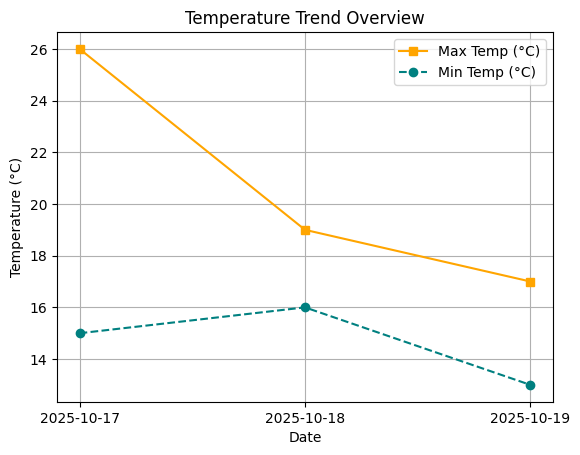

In [28]:
def create_temperature_visualisation(weather_data, output_type='display'):
    """
    Visualize daily temperature using a line + scatter plot.
    Uses interactive mode to allow input fields to appear after plotting.
    """
    days_list, max_temps, min_temps = [], [], []

    for day in weather_data['weather']:
        days_list.append(day['date'])
        max_temps.append(float(day['maxtempC']))
        min_temps.append(float(day['mintempC']))

    # Turn on interactive mode
    plt.ion()
    fig, ax = plt.subplots()
    ax.plot(days_list, max_temps, color='orange', marker='s', linestyle='-', label='Max Temp (°C)')
    ax.plot(days_list, min_temps, color='teal', marker='o', linestyle='--', label='Min Temp (°C)')
    ax.set_title("Temperature Trend Overview")
    ax.set_xlabel("Date")
    ax.set_ylabel("Temperature (°C)")
    ax.legend()
    plt.grid(True)

    plt.show()      # display figure without blocking
    plt.pause(0.1)  # small pause to render
    plt.close(fig)  # close figure so input can appear

    # Turn off interactive mode if needed
    plt.ioff()
data = get_weather_data("Perth",3)
create_temperature_visualisation(data)

Using a heatmap like bar Chart for visualising Precipitation



In [31]:
def create_precipitation_visualisation(weather_data, output_type='display'):
    days = [day['date'] for day in weather_data['weather']]
    values = [sum(float(h['precipMM']) for h in day['hourly']) for day in weather_data['weather']]
    max_val = max(values) if values else 1
    colors = [(0, 0.5, 1, val/max_val) for val in values]  # RGBA

    fig, ax = plt.subplots()
    ax.bar(days, values, color=colors)
    ax.set_title("Daily Precipitation Heatmap")
    ax.set_xlabel("Date")
    ax.set_ylabel("Rainfall (mm)")
    plt.grid(True)

    if output_type == 'figure':
        return fig
    else:
        plt.show()      # display figure without blocking
        plt.pause(0.1)  # small pause to render
        plt.close(fig)  # close figure so input can appear

         # Turn off interactive mode if needed
        plt.ioff()



Wind Speed Visualisation

In [32]:
def create_wind_visualisation(weather_data, output_type='display'):
    """
    Visualize daily wind speeds using bars and scatter points.
    """
    days = []
    max_winds = []
    first_hour_winds = []

    for day in weather_data['weather']:
        days.append(day['date'])
        max_winds.append(max(float(hour['windspeedKmph']) for hour in day['hourly']))
        first_hour_winds.append(float(day['hourly'][0]['windspeedKmph']))

    fig, ax = plt.subplots()
    ax.bar(days, max_winds, color='lightgreen', alpha=0.6, label='Max Wind Speed (km/h)')
    ax.scatter(days, first_hour_winds, color='darkgreen', label='First Hour Wind Speed', s=80, marker='o')

    ax.set_title("Daily Wind Speed Overview")
    ax.set_xlabel("Date")
    ax.set_ylabel("Wind Speed (km/h)")
    ax.legend()
    plt.grid(True)

    if output_type == 'figure':
        return fig
    else:
        plt.show()      # display figure without blocking
        plt.pause(0.1)  # small pause to render
        plt.close(fig)  # close figure so input can appear

        # Turn off interactive mode if needed
        plt.ioff()


## 🤖 Natural Language Processing

In [10]:
def parse_weather_question(query):
    """
    Extract keywords from a user's weather-related question.
    """
    query = query.lower()
    features = ['temperature', 'rain', 'precipitation', 'humidity', 'wind']
    time_refs = ['today', 'tomorrow', 'day after tomorrow']
    city, feature, time_ref = None, None, 'today'

    for f in features:
        if f in query:
            feature = f
            break
    for t in time_refs:
        if t in query:
            time_ref = t
            break

    words = query.split()
    if 'in' in words:
        idx = words.index('in')
        if idx + 1 < len(words):
            city = words[idx + 1]
    else:
        city = 'Sydney'

    return {'location': city, 'attribute': feature, 'time_period': time_ref}


## 🧩 Main Application Logic

In [25]:
def generate_weather_response(parsed_question, weather_data):
    """
    Formulates a human-readable response to a weather question.
    """
    city = parsed_question['location']
    attribute = parsed_question['attribute']
    time_label = parsed_question['time_period']
    idx = 0
    if time_label == 'tomorrow':
        idx = 1
    elif time_label == 'day after tomorrow':
        idx = 2

    try:
        day_info = weather_data['weather'][idx]
        if attribute in ['temperature', None]:
            t_high = day_info['maxtempC']
            t_low = day_info['mintempC']
            return f"In {city.title()} on {day_info['date']}, temperatures will range between {t_low}°C and {t_high}°C."
        elif attribute in ['rain', 'precipitation']:
            total = sum(float(hour['precipMM']) for hour in day_info['hourly'])
            return f"In {city.title()} on {day_info['date']}, the total rainfall will be around {total:.1f} mm."
        elif attribute == 'humidity':
            hum = day_info['hourly'][0]['humidity']
            return f"In {city.title()} on {day_info['date']}, humidity levels will be close to {hum}%."
        elif attribute == 'wind':
            wind_speed = day_info['hourly'][0]['windspeedKmph']
            return f"In {city.title()} on {day_info['date']}, wind speeds are expected to reach {wind_speed} km/h."
        else:
            return "Sorry, I couldn’t interpret that weather detail."
    except Exception as e:
        return f"Sorry, I couldn’t access the weather data: {e}"


## 🧭 User Interface

In [26]:
def main_menu():
    """
    Main interactive menu for the Weather App.
    """
    print("=== Weather Companion ===")
    while True:
        print("\nChoose an option below:")
        print("1 - Get Current Weather Summary")
        print("2 - Ask a Weather-related Question")
        print("3 - View Temperature Chart (Scatter)")
        print("4 - View Rainfall Graph (Horizontal Bar)")
        print("5 - Wind Speed Visuals for your city")
        print("6 - Exit")

        choice = pyip.inputChoice(['1', '2', '3', '4', '5','6'], prompt="Enter your option (1-6): ")

        if choice == '6':
            print("Exiting the Weather Companion. Stay updated!")
            break

        city_input = pyip.inputStr(prompt="Enter your city name: ")
        weather = get_weather_data(city_input, forecast_period=3)

        if not weather:
            print("Could not access the data. Try again later.")
            continue

        if choice == '1':
            print(generate_weather_response({'location': city_input, 'attribute': None, 'time_period': 'today'}, weather))
        elif choice == '2':
            user_query = pyip.inputStr(prompt="Type your weather question: ")
            parsed_query = parse_weather_question(user_query)
            parsed_query['location'] = city_input
            reply = generate_weather_response(parsed_query, weather)
            print(reply)
        elif choice == '3':
            create_temperature_visualisation(weather)
        elif choice == '4':
            create_precipitation_visualisation(weather)
        elif choice == '5':
            create_wind_visualisation(weather)

=== Weather Companion ===

Choose an option below:
1 - Get Current Weather Summary
2 - Ask a Weather-related Question
3 - View Temperature Chart (Scatter)
4 - View Rainfall Graph (Horizontal Bar)
5 - Wind Speed Visuals for your city
6 - Exit
Enter your option (1-6): 4
Enter your city name: Perth


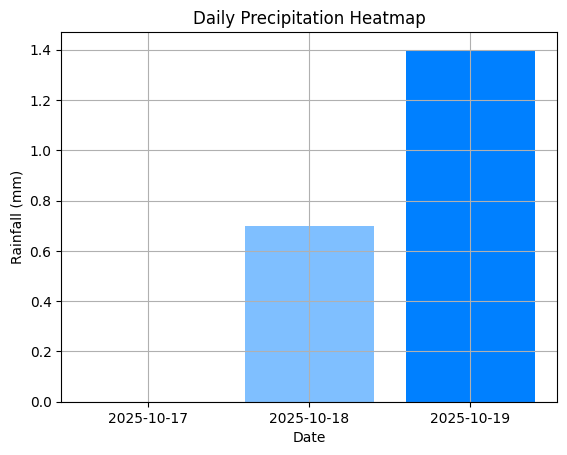


Choose an option below:
1 - Get Current Weather Summary
2 - Ask a Weather-related Question
3 - View Temperature Chart (Scatter)
4 - View Rainfall Graph (Horizontal Bar)
5 - Wind Speed Visuals for your city
6 - Exit
Enter your option (1-6): 5
Enter your city name: Sydney


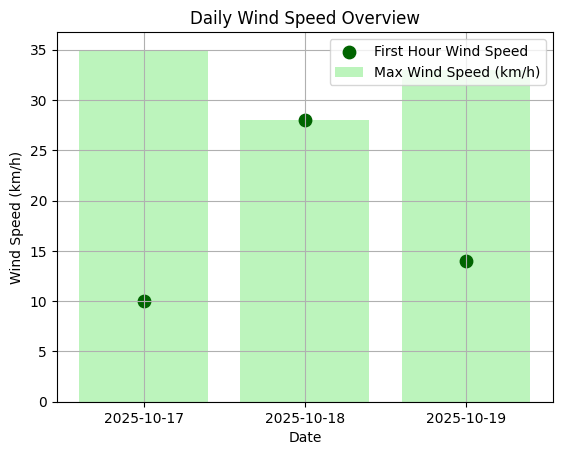


Choose an option below:
1 - Get Current Weather Summary
2 - Ask a Weather-related Question
3 - View Temperature Chart (Scatter)
4 - View Rainfall Graph (Horizontal Bar)
5 - Wind Speed Visuals for your city
6 - Exit
Enter your option (1-6): 6
Exiting the Weather Companion. Stay updated!


In [33]:
main_menu()

🧪 Testing and Examples

In [ ]:
# Include sample input/output for each function

## 🗂️ AI Prompting Log (Optional)
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.